In [1]:
import numpy as np
import k3d
import os

In [2]:
def gen_cylinder_inside(r, h, n_points, tolerance=0.0, center = [0,0,0]):
    x1=center[0]
    y1=center[1]
    z1=center[2]
    points = []
    
    for _ in range(n_points):
        radial_distance = np.sqrt(np.random.uniform(0, (r - tolerance) ** 2))
        theta = np.random.uniform(0, 2 * np.pi)
        z = np.random.uniform(z1-h/2, z1 + h/2)
        
        x = radial_distance * np.cos(theta) + x1
        y = radial_distance * np.sin(theta) + y1
        
        points.append([x, y, z])
    
    points = np.array(points)
    return points

radius = 5
height = 5
n_points = 25000
centers = [
    [0, 0, 0],
    [10, 10, 0],
    [-10, 10, 0],
]

# points, color
all_points = []

for center in centers:
    all_points.append(
        (gen_cylinder_inside(radius, height, n_points, center=center), 0x444444, 0.1)
    )

# agent
agent_start = np.array([-10, 0, 0])
all_points.append(
    (agent_start, 0xFFFFFF, 2)
)
end = [-12, 12, 0]

def generate_smooth_trajectory(start, end, centers, safe_distance, num_points=100):
    waypoints = [np.array(start)]
    for center in centers:
        dir_vector = np.array(center[:2]) - waypoints[-1][:2]
        dir_vector = dir_vector / np.linalg.norm(dir_vector) * safe_distance
        tangent_point = np.array(center[:2]) - dir_vector  # Move away from the obstacle

        waypoints.append(np.array([tangent_point[0], tangent_point[1], 0]))

    waypoints.append(np.array(end))
    waypoints = np.array(waypoints)

    smoothed_path = []
    for i in range(len(waypoints) - 1):
        segment = np.linspace(waypoints[i], waypoints[i + 1], num_points // (len(waypoints) - 1))
        smoothed_path.append(segment)

    smoothed_path = np.vstack(smoothed_path)
    return smoothed_path

# num_interpolation_points = 300  # More points for smoother trajectory
# smooth_trajectory = generate_smooth_trajectory(agent_start, end, centers, safe_distance, num_interpolation_points)
# all_points.append(
#     (smooth_trajectory, 0xff0000, 0.5)
# )


In [3]:
plot = k3d.plot()
for points, color, point_size in all_points:
    plot += k3d.points(positions=points, point_size=point_size, color=color, name='inside')

plot.display()

/scratch/rhm4nj/.conda/ginn_env11/lib/python3.11/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "float64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(
/scratch/rhm4nj/.conda/ginn_env11/lib/python3.11/site-packages/traittypes/traittypes.py:97: UserWarning: Given trait value dtype "int64" does not match required type "float32". A coerced copy has been created.
  warnings.warn(


Output()

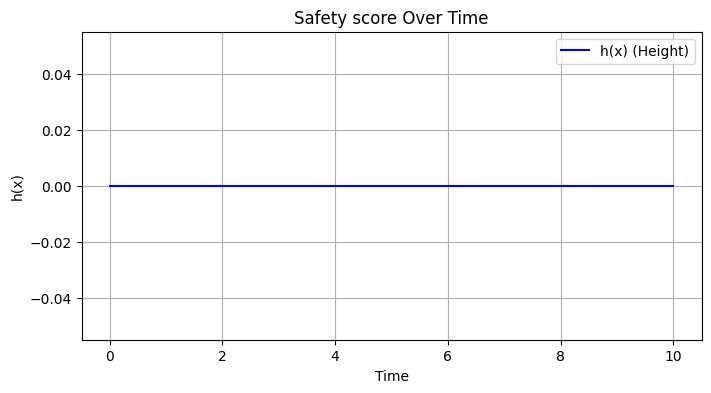

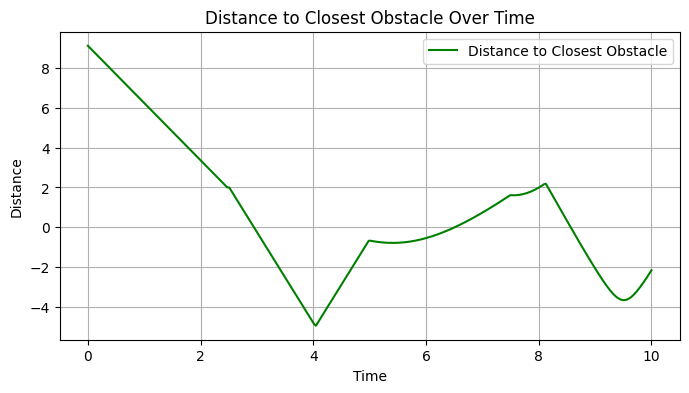

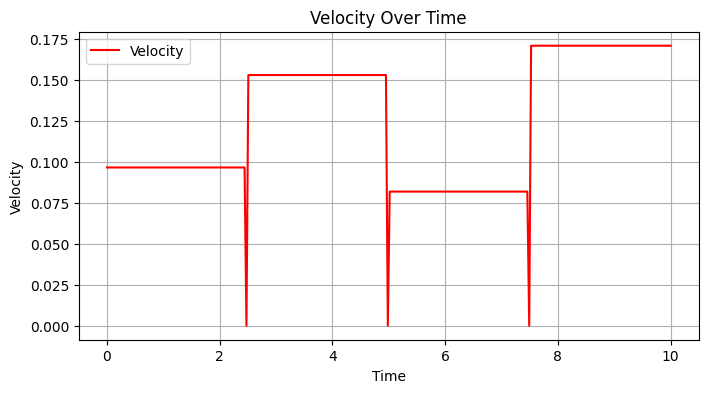

In [6]:
# Graph generation:

# Re-import necessary libraries after execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Redefine cylindrical obstacles
radius = 5
height = 5
centers = np.array([
    [0, 0, 0],
    [8, 8, 0],
    [-8, 10, 0]
])

# Redefine start and end points
start = np.array([-10, -10, 0])
end = np.array([10, 10, 0])

# Define a safe distance to avoid collision
safe_distance = radius + 2

# Function to generate a smooth trajectory avoiding obstacles
def generate_smooth_trajectory(start, end, centers, safe_distance, num_points=300):
    waypoints = [np.array(start)]

    for center in centers:
        dir_vector = np.array(center[:2]) - waypoints[-1][:2]
        dir_vector = dir_vector / np.linalg.norm(dir_vector) * safe_distance
        tangent_point = np.array(center[:2]) - dir_vector  # Move away from the obstacle

        waypoints.append(np.array([tangent_point[0], tangent_point[1], 0]))

    waypoints.append(np.array(end))
    waypoints = np.array(waypoints)

    # Interpolate between waypoints for a smoother path
    smoothed_path = []
    for i in range(len(waypoints) - 1):
        segment = np.linspace(waypoints[i], waypoints[i + 1], num_points // (len(waypoints) - 1))
        smoothed_path.append(segment)

    smoothed_path = np.vstack(smoothed_path)
    return smoothed_path

# Generate smooth trajectory
smooth_trajectory = generate_smooth_trajectory(start, end, centers, safe_distance)

# Generate time axis
time = np.linspace(0, 10, len(smooth_trajectory))

# Define h(x) as the height (z-coordinate) over time
h_x = smooth_trajectory[:, 2]

# Compute distance to closest obstacle over time
distances = np.array([
    np.min([np.linalg.norm(point[:2] - center[:2]) - radius for center in centers])
    for point in smooth_trajectory
])

# Compute velocity as the magnitude of the difference between consecutive points
velocities = np.linalg.norm(np.diff(smooth_trajectory, axis=0), axis=1)
velocities = np.append(velocities, velocities[-1])  # Maintain array length

# Plot h(x) over time
plt.figure(figsize=(8, 4))
plt.plot(time, h_x, 'b-', label="h(x) (Height)")
plt.xlabel("Time")
plt.ylabel("h(x)")
plt.title("Safety score Over Time")
plt.legend()
plt.grid()
plt.savefig("imgs/hx.png")
plt.show()

# Plot distance to closest obstacle over time
plt.figure(figsize=(8, 4))
plt.plot(time, distances, 'g-', label="Distance to Closest Obstacle")
plt.xlabel("Time")
plt.ylabel("Distance")
plt.title("Distance to Closest Obstacle Over Time")
plt.legend()
plt.grid()
plt.savefig("imgs/distance.png")
plt.show()

# Plot velocity over time
plt.figure(figsize=(8, 4))
plt.plot(time, velocities, 'r-', label="Velocity")
plt.xlabel("Time")
plt.ylabel("Velocity")
plt.title("Velocity Over Time")
plt.legend()
plt.grid()
plt.savefig("imgs/velocity.png")
plt.show()
